# Check skew in data

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from scipy.stats import lognorm,boxcox,norm
from sklearn.preprocessing import PowerTransformer


In [2]:
Data=pd.read_csv('1000_y_data.csv')

In [19]:
Data.columns[48]

'rib23'

In [9]:
Data['Pelvis_Acc_Rmax(g)'].skew()

1.3159322522205181

In [22]:
for i in range (26,50):
    print('{}'.format(np.log(Data[Data.columns[i]]).skew()))
    

0.8629802964724013
1.5047015302784363
0.6881200189834195
0.5057607609983611
0.8737088154518561
0.7036248470664654
1.310778815811306
1.3105637122619893
1.3485160421732925
0.9184456922297463
0.6030820652969222
0.639302734900737
0.49180472056562213
0.8767223622077952
0.3883495634623379
0.4265252618248275
0.5607099581363189
0.40730040269559403
0.1392222653828649
0.26256208302540185
0.3031359148428298
1.0142600938537036
0.834946641164287
2.0396933321863497


In [11]:
from sklearn.preprocessing import QuantileTransformer
dd=QuantileTransformer()
yv=Data['Pelvis_Acc_Rmax(g)'].to_numpy()
yv=yv.reshape(-1, 1)
yt=dd.fit_transform(yv)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (995). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


In [12]:
pd.DataFrame(yt).skew()

0    0.000105
dtype: float64

In [25]:
# Chest_deflection = Data.columns[23]
# pelvis = Data.columns[24]
X = Data[Data.columns[1:23]]
y = Data['rib14']

# cv = KFold(n_splits=10)

In [26]:
y.skew()

6.0002055824962595

# Initial Data

C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rib14', ylabel='Density'>

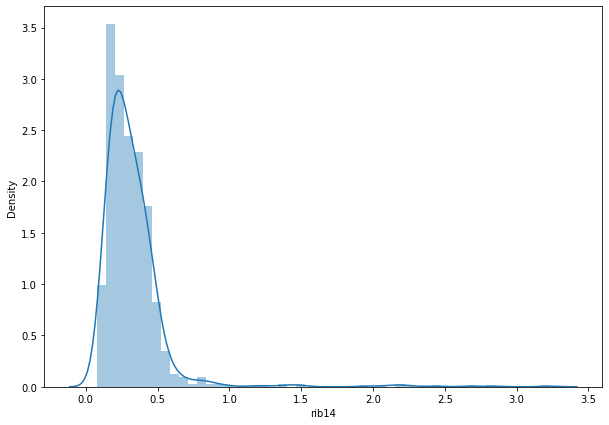

In [27]:
plt.figure(figsize=(10,7))
sns.distplot(y,hist=True)

# SQRT

C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2.9025295255741463

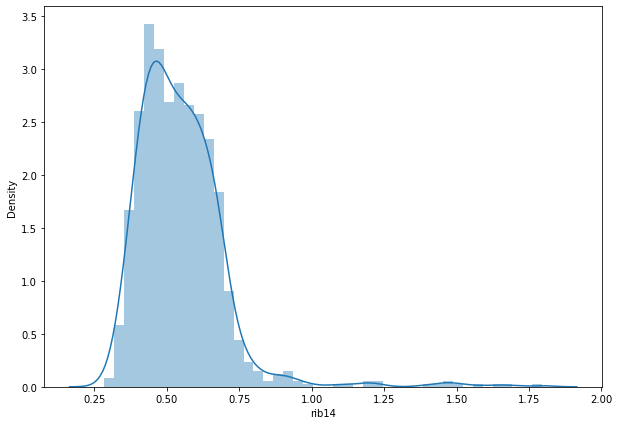

In [28]:
y_2 = np.sqrt(y)
plt.figure(figsize=(10,7))
sns.distplot(y_2,hist=True)
y_2.skew()

# Cube root

C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2.0812958641477444

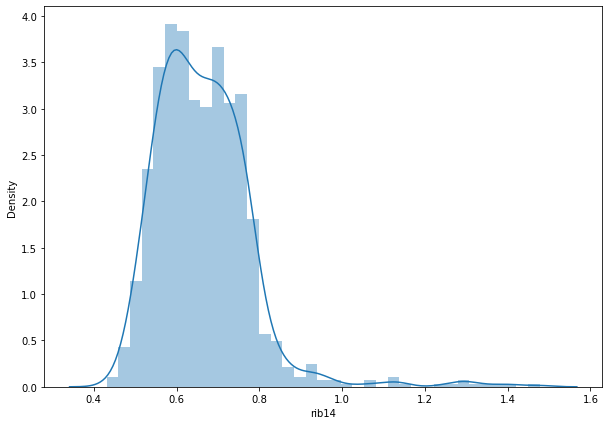

In [29]:
y_3 = np.cbrt(y)
plt.figure(figsize=(10,7))
sns.distplot(y_3,hist=True)
y_3.skew()

# Log1p

C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.8767223622077952

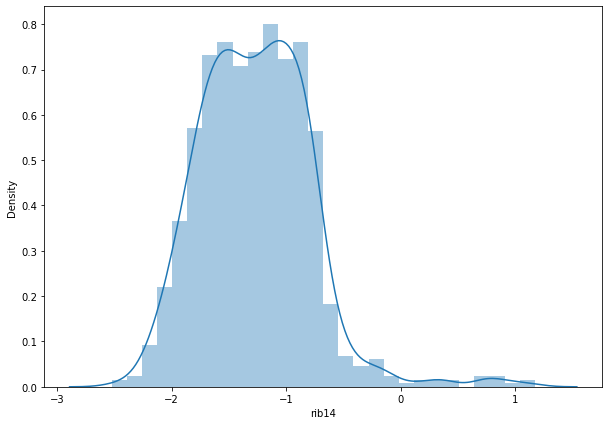

In [32]:
y_lg = np.log(y)
plt.figure(figsize=(10,7))
sns.distplot(y_lg,hist=True)
y_lg.skew()

# Powerrr!

C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0    0.107114
dtype: float64

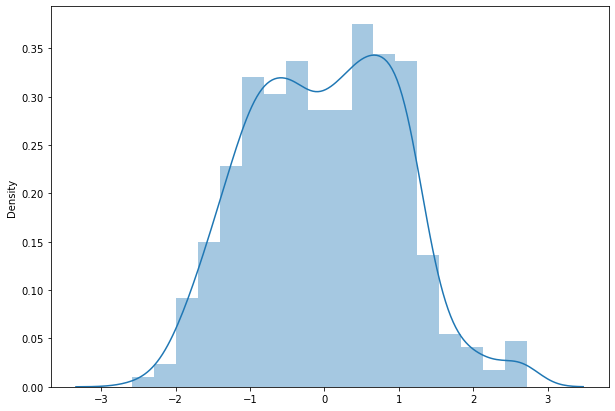

In [33]:
power = PowerTransformer(method='yeo-johnson', standardize=True)

ax=y.values.reshape(-1, 1)
yu = power.fit_transform(ax)
plt.figure(figsize=(10,7))
sns.distplot(yu,hist=True)
yu=pd.DataFrame(yu)
yu.skew()

C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0    2.666193
dtype: float64

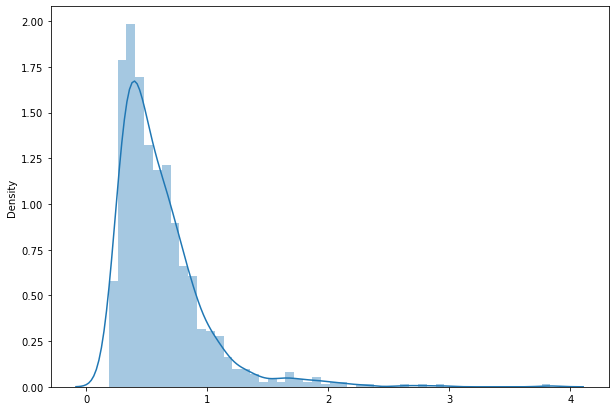

In [7]:
lk=power.inverse_transform(yu)

plt.figure(figsize=(10,7))
sns.distplot(lk,hist=True)
yu=pd.DataFrame(lk)
yu.skew()

In [32]:
print(power.lambdas_)

[-2.4043817]


# Quantile

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (995). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0    7.230408e-12
dtype: float64

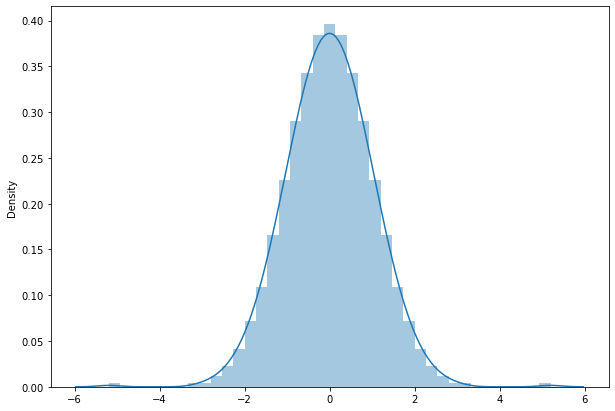

In [9]:
scaler=QuantileTransformer(output_distribution='normal')
ax=y.values.reshape(-1, 1)
dkl=scaler.fit_transform(ax)
plt.figure(figsize=(10,7))
sns.distplot(dkl,hist=True)
dkl=pd.DataFrame(dkl)
dkl.skew()

C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0    2.666193
dtype: float64

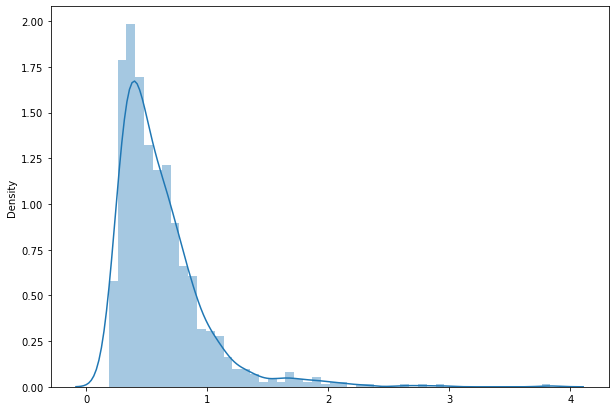

In [11]:
lk=scaler.inverse_transform(dkl)

plt.figure(figsize=(10,7))
sns.distplot(lk,hist=True)
yu=pd.DataFrame(lk)
yu.skew()